# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("spam.xlsx")

In [3]:
df.shape

(5571, 5)

In [4]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<!-- Data Cleaning
EDA
Text Preprocsssing
Model building
Evaluation
Improvement
Website
Deploy -->  

#**1. Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5571 non-null   object
 1   v2          5571 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [6]:
#drop last 3 columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [7]:
df.sample(5)

,v1,v2
3467,ham,All day working day:)except saturday and sunday..
2626,ham,I know I'm lacking on most of this particular ...
1795,ham,"Hey, can you tell me blake's address? Carlos w..."
2291,ham,:-( that's not v romantic!
2808,ham,Mm so you asked me not to call radio


In [8]:
#renaming the columns name
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace= True )
df.sample(5)

,target,text
4999,ham,"Nope. Since ayo travelled, he has forgotten hi..."
4015,ham,Eek that's a lot of time especially since Amer...
3775,spam,"Mila, age23, blonde, new in UK. I look sex wit..."
3547,ham,"I got like $ &lt;#&gt; , I can get some more l..."
2980,ham,"Tonight? Yeah, I'd be down for that"


In [9]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [10]:
# ham = 0, spam = 1
df['target'] = encode.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [13]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5168, 2)

# **2. EDA**

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4515
1     653
Name: count, dtype: int64

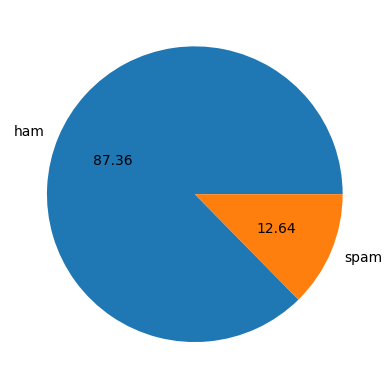

In [18]:
#pie chart
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

Data is imbalanced

In [19]:
import nltk

In [20]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# total no. of characters in each SMS
df['text'].astype(str)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5566    This is the 2nd time we have tried 2 contact u...
5567                Will Ì_ b going to esplanade fr home?
5568    Pity, * was in mood for that. So...any other s...
5569    The guy did some bitching but I acted like i'd...
5570                           Rofl. Its true to its name
Name: text, Length: 5168, dtype: object

In [22]:
df['num_char'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
#break into small sentences
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df[['num_char', 'num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,5168.000000,5168.000000,5168.000000
mean,78.994969,18.459172,1.965751
std,58.235445,13.323834,1.448619
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
 #ham describe
df[df['target'] == 0][['num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,4515.000000,4515.000000,4515.000000
mean,70.476855,17.127353,1.820377
std,56.359585,13.493330,1.383756
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
 #spam describe
df[df['target'] == 1][['num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

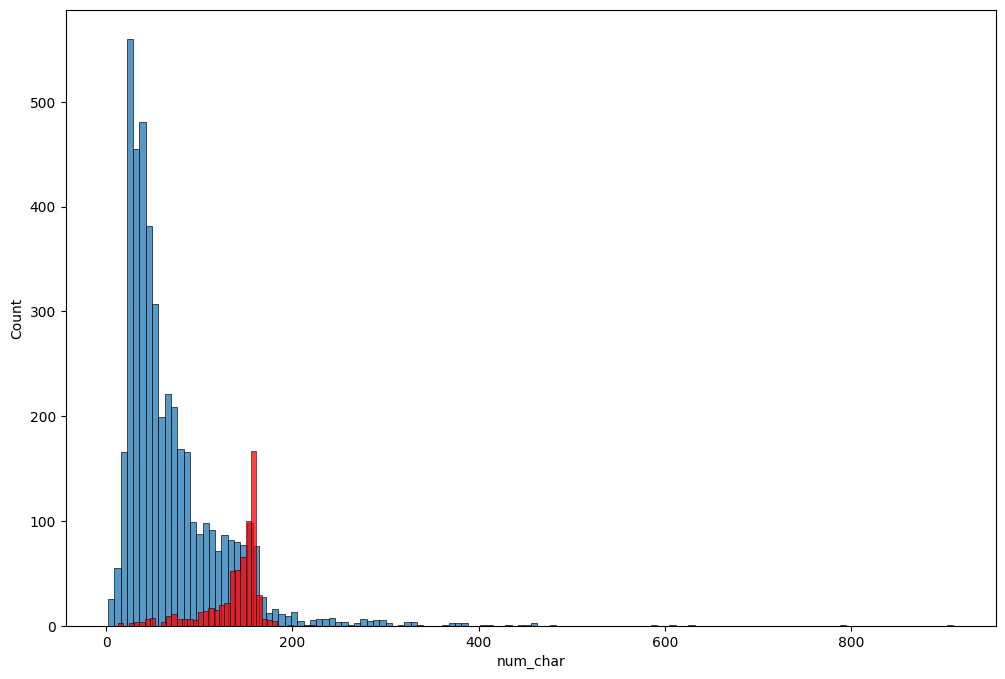

In [29]:
plt.figure(figsize= (12,8))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color= 'red')

<Axes: xlabel='num_words', ylabel='Count'>

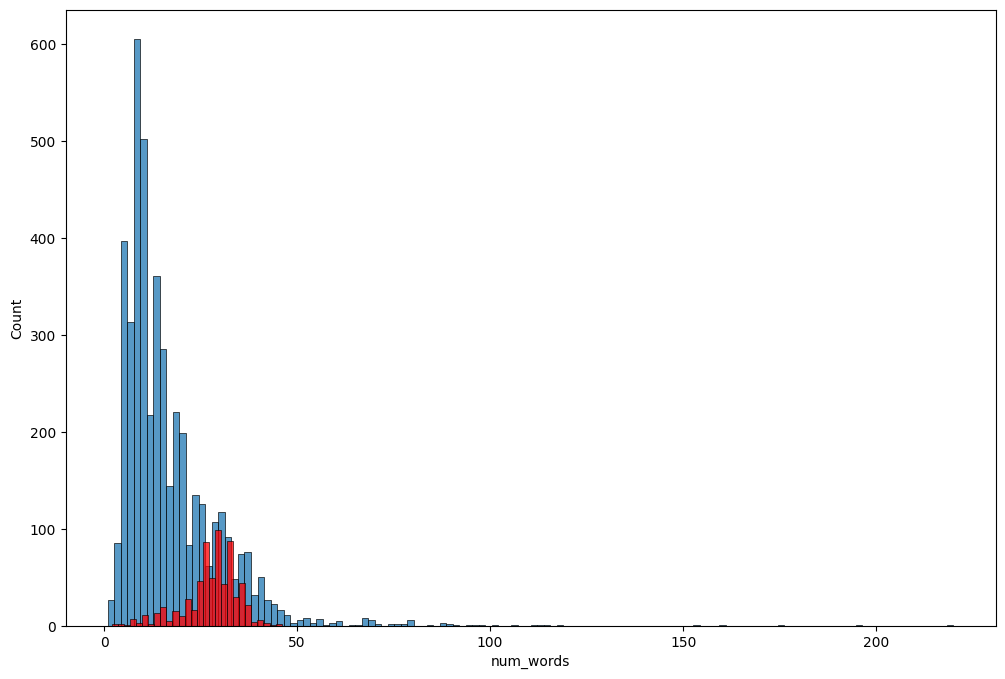

In [30]:
plt.figure(figsize= (12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color= 'red')

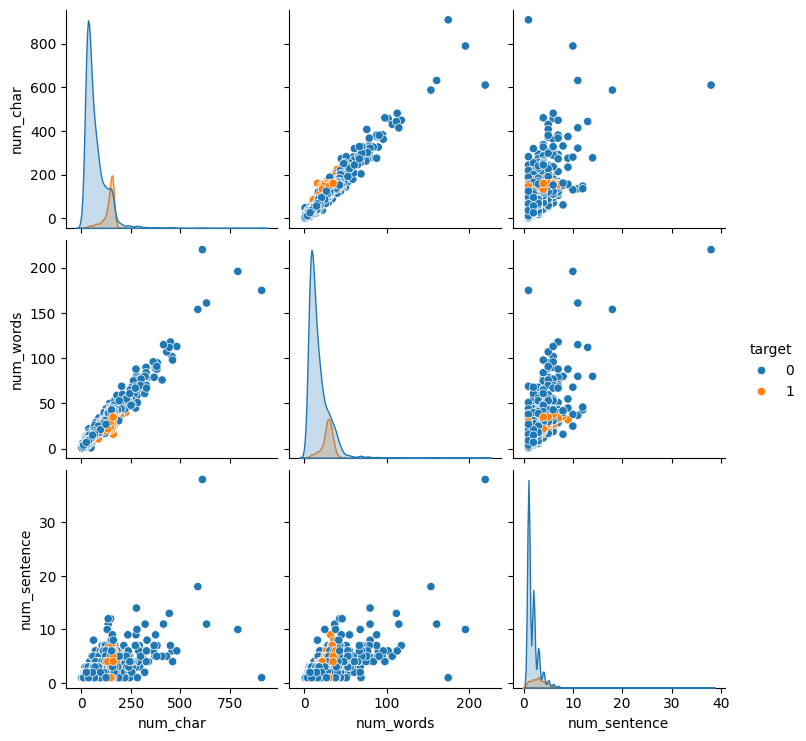

In [31]:
sns.pairplot(df, hue= 'target')

<Axes: >

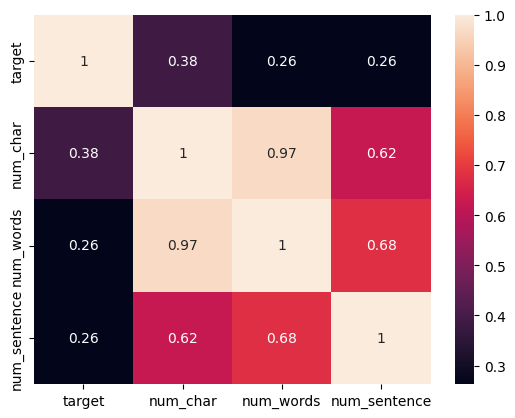

In [32]:
sns.heatmap(df[['target', 'num_char', 'num_words', 'num_sentence']].corr(), annot = True)

# **3. Data Preprpcessing**

1. Lower case
1. Tokenization
1. Removing special characters
2. Removing stop words and punctuation
2. Stemming

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
#python function to perform all these steps

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [37]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [44]:
#spam word cloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

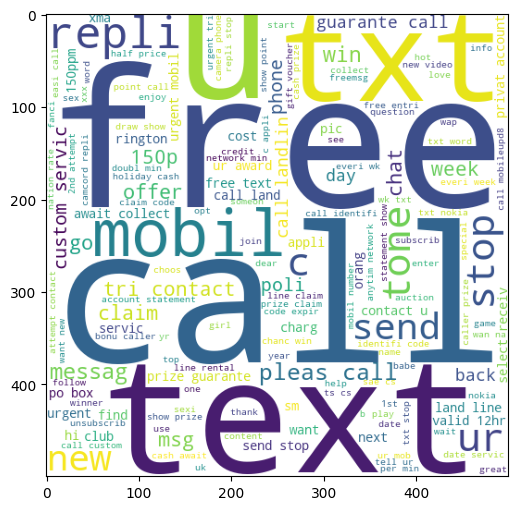

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
#Ham word cloud
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

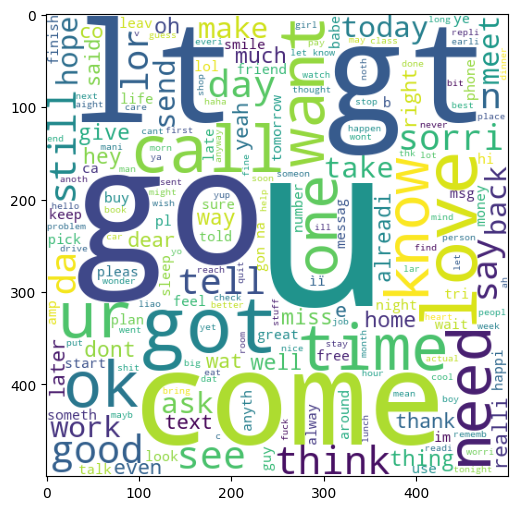

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
#Top 30 words in sapm msg
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

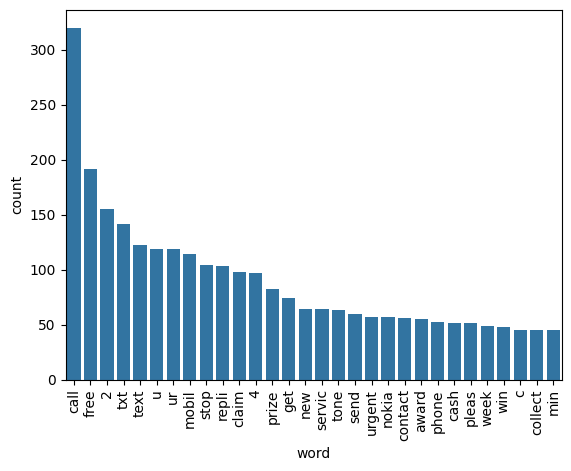

In [50]:
from collections import Counter

# Create a DataFrame from the most common words and their counts
spam_word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot the bar chart using the DataFrame and specifying x and y
sns.barplot(x='word', y='count', data=spam_word_counts)
plt.xticks(rotation= 'vertical')
plt.show()

In [51]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35401

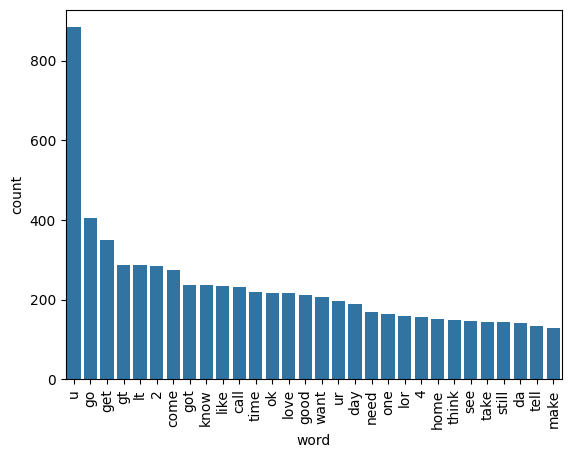

In [53]:
from collections import Counter

# Create a DataFrame from the most common words and their counts
ham_word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot the bar chart using the DataFrame and specifying x and y
sns.barplot(x='word', y='count', data=ham_word_counts)
plt.xticks(rotation= 'vertical')
plt.show()

# **4. Model Building**

In [54]:
df.head()

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)

In [ ]:
# X = cv.fit_transform(df['transformed_text']).toarray()

In [57]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

#Not improve thw accuracy and precision

In [ ]:
# X = np.hstack((X, df['num_char'].values.reshape(-1,1)))

In [58]:
X.shape

(5168, 3000)

In [59]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5168,))

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2, test_size = 0.2)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

**4.1 Gaussian Naive Bayes**

In [63]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8723404255319149
[[796 106]
 [ 26 106]]
0.5


**4.2 Multinomial Naive Bayes**

In [64]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.971953578336557
[[902   0]
 [ 29 103]]
1.0


**4.3 Bernoulli Naive Bayes**

In [65]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9758220502901354
[[899   3]
 [ 22 110]]
0.9734513274336283


In [ ]:
# A = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# A.shape

In [ ]:
# b = df['target'].values
# b

In [ ]:
# A_train, A_test, b_train, b_test = train_test_split(A,b, random_state = 2, test_size = 0.2)

In [ ]:
# gnb.fit(A_train, b_train)
# b_pred1 = gnb.predict(A_test)
# print(accuracy_score(b_test, b_pred1))
# print(confusion_matrix(b_test, b_pred1))
# print(precision_score(b_test, b_pred1))

In [ ]:
# mnb.fit(A_train, b_train)
# b_pred2 = mnb.predict(A_test)
# print(accuracy_score(b_test, b_pred2))
# print(confusion_matrix(b_test, b_pred2))
# print(precision_score(b_test, b_pred2))

In [ ]:
# bnb.fit(A_train, b_train)
# b_pred3 = bnb.predict(A_test)
# print(accuracy_score(b_test, b_pred3))
# print(confusion_matrix(b_test, b_pred3))
# print(precision_score(b_test, b_pred3))

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [69]:
svc = SVC(kernel = 'sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators =50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [70]:
clfs = {'SVC' : svc, 'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc, 'GBDT':gbdt, 'xgb':xgb}
#

In [71]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [72]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9709864603481625, 0.9636363636363636)

In [73]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
  print("For ", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9709864603481625
Precision -  0.9636363636363636
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8505747126436781
For  LR
Accuracy -  0.9487427466150871
Precision -  0.9247311827956989


C:\Users\prata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\prata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  RF
Accuracy -  0.9680851063829787
Precision -  0.9714285714285714
For  AdaBoost
Accuracy -  0.9274661508704062
Precision -  0.8701298701298701
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.865546218487395
For  ETC
Accuracy -  0.9700193423597679
Precision -  0.954954954954955
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9204545454545454
For  xgb
Accuracy -  0.9593810444874274
Precision -  0.9245283018867925


In [74]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending = False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RF,0.968085,0.971429
0,SVC,0.970986,0.963636
8,ETC,0.970019,0.954955
4,LR,0.948743,0.924731
10,xgb,0.959381,0.924528
9,GBDT,0.943907,0.920455
6,AdaBoost,0.927466,0.870130
7,BgC,0.956480,0.865546


In [75]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.968085
3,SVC,Accuracy,0.970986
4,ETC,Accuracy,0.970019
5,LR,Accuracy,0.948743
6,xgb,Accuracy,0.959381
7,GBDT,Accuracy,0.943907
8,AdaBoost,Accuracy,0.927466
9,BgC,Accuracy,0.956480


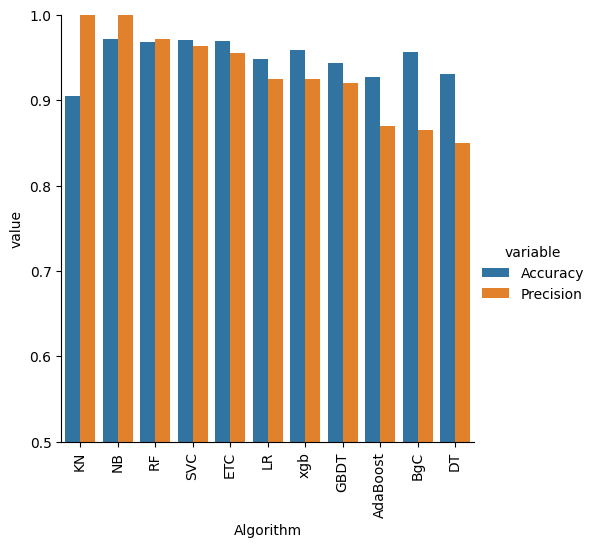

In [76]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5,1)
plt.xticks(rotation = 'vertical')
plt.show()

# **Model Improve**

In [ ]:
# 1 Change the max_features parameter of IfIdf

In [77]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending = False)

In [78]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')

In [79]:
temp_df1 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaling': accuracy_scores, 'Precision_scaling': precision_scores}).sort_values('Precision_scaling', ascending = False)

In [80]:
new_df_scaled = new_df.merge(temp_df1, on = 'Algorithm')

In [81]:
temp_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [82]:
new_df_scaled.merge(temp_df2,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,RF,0.968085,0.971429,0.968085,0.971429,0.968085,0.971429,0.968085,0.971429
3,SVC,0.970986,0.963636,0.970986,0.963636,0.970986,0.963636,0.970986,0.963636
4,ETC,0.970019,0.954955,0.970019,0.954955,0.970019,0.954955,0.970019,0.954955
5,LR,0.948743,0.924731,0.948743,0.924731,0.948743,0.924731,0.948743,0.924731
6,xgb,0.959381,0.924528,0.959381,0.924528,0.959381,0.924528,0.959381,0.924528
7,GBDT,0.943907,0.920455,0.943907,0.920455,0.943907,0.920455,0.943907,0.920455
8,AdaBoost,0.927466,0.870130,0.927466,0.870130,0.927466,0.870130,0.927466,0.870130
9,BgC,0.956480,0.865546,0.956480,0.865546,0.956480,0.865546,0.956480,0.865546


In [83]:
performance_df.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000
2,RF,0.968085,0.971429,0.968085,0.971429
3,SVC,0.970986,0.963636,0.970986,0.963636
4,ETC,0.970019,0.954955,0.970019,0.954955
5,LR,0.948743,0.924731,0.948743,0.924731
6,xgb,0.959381,0.924528,0.959381,0.924528
7,GBDT,0.943907,0.920455,0.943907,0.920455
8,AdaBoost,0.927466,0.870130,0.927466,0.870130
9,BgC,0.956480,0.865546,0.956480,0.865546


In [84]:
# Voting Classifier

svc = SVC(kernel = 'sigmoid', gamma = 1, probability= True )
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators= 50, random_state= 2)

from sklearn.ensemble import VotingClassifier

In [85]:
voting = VotingClassifier(estimators= [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [86]:
voting.fit(X_train, y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [87]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.97678916827853
Precision 1.0


In [88]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [89]:
# applying stacking
from sklearn.ensemble import StackingClassifier


In [90]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [92]:
clf.fit(X_train, y_train)



,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.The type of estimator is generally expected to be a classifier.However, one can pass a regressor for some use case (e.g. ordinalregression).","[('svm', ...), ('nb', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA classifier which will be used to combine the base estimators.The default classifier is a:class:`~sklearn.linear_model.LogisticRegression`.",RandomForestClassifier()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",None
,"stack_method stack_method: {'auto', 'predict_proba', 'decision_function', 'predict'}, default='auto'Methods called for each base estimator. It can be:* if 'auto', it will try to invoke, for each estimator, `'predict_proba'`, `'decision_function'` or `'predict'` in that order.* otherwise, one of `'predict_proba'`, `'decision_function'` or `'predict'`. If the method is not implemented by the estimator, it will raise an error.",'auto'
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degre

In [100]:
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.9669421487603306


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Create vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Fit vectorizer on full corpus
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target']

# Train model
model = MultinomialNB()
model.fit(X, y)

# Confirm fitted
print("Fitted:", hasattr(model, "classes_"))



Fitted: True


In [ ]:
# Save properly
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))